In [1]:
import sys
sys.path.insert(0, "../")

In [2]:
from fab.learnt_distributions.distrax_realNVP_flo import make_realnvp_dist_funcs
from fab.target_distributions.many_well import DoubleWellEnergy
from fab.agent.fab_agent import AgentFAB
from fab.utils.plotting import plot_history, plot_marginal_pair, plot_contours_2D
import matplotlib.pyplot as plt
import optax
import jax
import jax.numpy as jnp

2022-03-01 23:07:40.199186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [3]:
dim = 2
flow_num_layers = 10
mlp_hidden_size_per_x_dim = 5

In [4]:
real_nvp_flo = make_realnvp_dist_funcs(dim, flow_num_layers,
                                       mlp_hidden_size_per_x_dim=mlp_hidden_size_per_x_dim)
target_log_prob = DoubleWellEnergy(dim=dim).log_prob
batch_size = 64
n_iter = 4000
lr = 5e-4
n_intermediate_distributions: int = 2
AIS_kwargs = {"additional_transition_operator_kwargs": {"step_tuning_method": "p_accept"}}

In [5]:
fab_agent = AgentFAB(learnt_distribution=real_nvp_flo,
                     target_log_prob=target_log_prob,
                     batch_size=batch_size, n_iter=n_iter,
                     n_intermediate_distributions=n_intermediate_distributions,
                     AIS_kwargs=AIS_kwargs,
                     optimizer=optax.adam(lr))

using linear spacing as there is 2intermediate distribution


In [6]:
fab_agent.run()

ESS: 0.857822578517878: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [01:40<00:00, 39.72it/s]


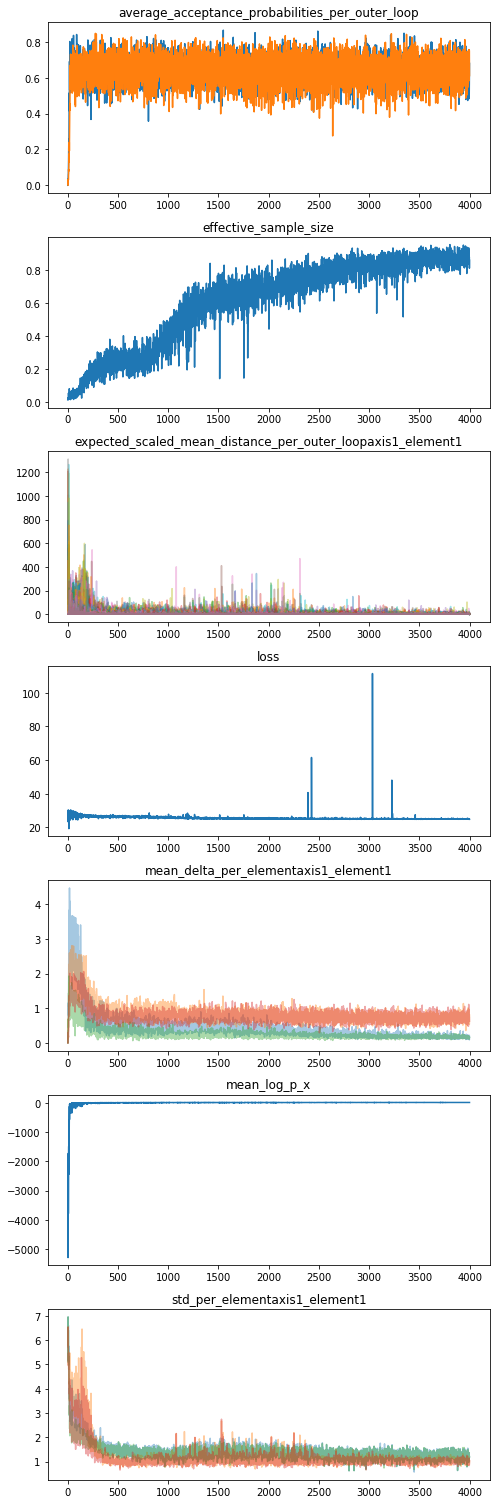

In [7]:
plot_history(fab_agent.history)
plt.show()

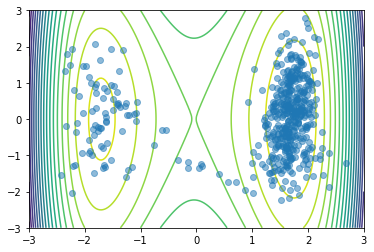

In [8]:
fig, ax = plt.subplots()
plot_contours_2D(fab_agent.target_log_prob, ax=ax, bound=3, levels=20)
samples = fab_agent.learnt_distribution.sample.apply(
    fab_agent.learnt_distribution_params,
    jax.random.PRNGKey(0), (500,))
plot_marginal_pair(samples, ax=ax)